# <font color='deepskyblue'>Cosmology MCMC notebook </font>

## <font color='deepskyblue'>Preliminaries</font>

In [31]:
# Install required packages (if not available on server)
try:
  import getdist
except:
  !pip install getdist
  import getdist

# Load required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integrate

# import pylab
import getdist, IPython, time
from numpy import random

# from IPython.display import Image
from getdist import plots, MCSamples, loadMCSamples

# just for printing! calculations should be performed with machine precision
%precision 3

'%.3f'


<font color='tomato'>
(NB: The equations you'll directly need to build your code are those $\boxed{\text{with a box around}}$)
</font>

## <font color='deepskyblue'>The $\Lambda$CDM Model</font>

The Lambda-Cold-Dark-Matter ($\Lambda$CDM) Model is our concordance cosmological model. It postulates a Universe that behaves according to **General Relativity**, filled with **baryons** (protons, neutrons - the stuff we and stars are made of!), **Cold Dark Matter (CDM)** and a **Cosmological Constant** $\Lambda$.

The expansion of the Universe is best described in terms of the **scale factor** $a$ (the "radius" of the Universe, conventionally set to 1 today) and the **Hubble rate** $H$. While photons (light rays) travel in the expanding universe they get redshifted, and this redshift is directly related to the size of the Universe when the photon was emitted compared to today:

$$ \frac{\lambda_{\rm obs}}{\lambda_{\rm em}} \equiv 1 + z_{\rm em} = \frac{1}{a_{\rm em}}$$


In the $\Lambda$CDM model (and at late enough times), this additionally simplifies to

$$
\begin{gathered}
\boxed{
H^2 = H_0^2\left[\Omega_\Lambda + \Omega_m (1+z)^3 + \Omega_k (1+z)^2\right]
}
\\
\boxed{
\Omega_m + \Omega_\Lambda + \Omega_k = 1
}
\end{gathered}
\tag{1}
$$

$H_0$ is the value of the Hubble rate *today*, and the parameters $\Omega_m$, $\Omega_\Lambda$ and $\Omega_k$ are dimensionless quantities indicating how much of the present expansion of the Universe is due to (non-relativistic) matter, cosmological constant $\Lambda$, and spatial curvature $k$. Note that the three $\Omega$'s are *not independent* (their sum is 1) and that we grouped together the contribution of baryons and CDM,

$$
\Omega_m = \Omega_{\rm CDM} + \Omega_{\rm b}
$$

and that we have evidence that independent evidence that $\Omega_b \approx 5$\%. NB: only $\Omega_m \geq 0$ makes physical sense, while in principle both $\Omega_\Lambda$ and $\Omega_k$ can be negative.

The present Hubble rate is conventionally parametrised in terms of the dimensionless $h$:

$$
\boxed{
  H_0 \equiv 100\,h\,\frac{\rm km}{\rm s\,Mpc}
}
\tag{2}
$$

where Mpc = Megaparsec and [parsec](https://en.wikipedia.org/wiki/Parsec) equals to about $3.26$ light years or $3.086 \cdot 10^{16}$ m.

In essence, these equations give us the relation between *what exists in the Universe* and *how the Universe expanded*. Measure one, I can tell you the other. This is precisely what we aim to do!

Time to define the function $H(z)$. Don't forget to include the useful parameters as arguments of the function, and to define `parsec`.

In [4]:
# Hubble rate: look at equations (1) and (2) for the definition!
def Hubble(z,Ol,Om,h):
    H0= 100*h
    Ok=1-Om-Ol
    H=H0*(Ol+Om*(1+z)**3+Ok*(1+z)**2)**0.5
    return H # <--- YOUR CODE GOES HERE!

## <font color='deepskyblue'>Supernovae Ia</font>

In order to track the expansion of the Universe, we will look at Supernovae type Ia observations. SNIa are formed when a *white dwarf* accretes matter from a companion until it reaches a critical mass of about $1.44 M_\odot$ (solar masses), after which it explodes **at always the same luminosity** $L_{\rm SN}$. Therefore, the observed [magnitude](https://en.wikipedia.org/wiki/Magnitude_(astronomy)) is only a function of their [**luminosity distance**](https://en.wikipedia.org/wiki/Distance_measures_(cosmology)) from Earth, defined as the ratio of the intrinsic luminosity $L_{\rm SNIa}$ and the measured *surface brightness* $\Phi$ (energy per unit time per unit area)

$$ d_L\equiv \frac{L_{\rm SN}}{4\pi \Phi} $$

We can express the luminosity distance in terms of the Hubble rate:

$$
\boxed{
d_L(z) = \frac{c}{H_0}(1+z) \times
\begin{cases}
    \cfrac{1}{\sqrt{\Omega_k}} \,\sinh\left(\sqrt{\Omega_k}\,D(z)\right) & \Omega_k > 0
    \\[.5em]
    D(z) & \Omega_k = 0
    \\[.5em]
    \cfrac{1}{\sqrt{-\Omega_k}} \,\sin\left(\sqrt{-\Omega_k}\,D(z)\right) & \Omega_k < 0
\end{cases}
\qquad\qquad
D(z) \equiv H_0\int_0^z \frac{{\rm d}Z}{H(Z)}
}
\tag{3}
$$

where $c$ is the speed of light: $c \simeq 2.998 \cdot 10^{5}$ km/s.

Clearly, there exists a relation between $d_L(z)$ and $H(z)$, so the luminosity distance is a useful measure of the Universe expansion history.
In practice, however, the actual observable for [Supernovae Type Ia](https://en.wikipedia.org/wiki/Type_Ia_supernova) (or SNIa) is the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) $\mu$, defined as the difference between the *apparent magnitude* $m$ and the *absolute magnitude* $M$:

$$
\boxed{
\mu(z) \equiv m(z) - M \equiv 5 \log_{10} \frac{d_L(z)}{10\,\text{pc}}
}
\tag{4}
$$

We can create the function `dL(z, h, Omega_m, Omega_Lambda)`. You can also pass the function `Hubble` as an argument: `dL(z, Hubble, Omega_m, Omega_Lambda)`. Additionally, you can create $D(z)$ for your convenience.

Note that you need to integrate the function $H(z)$, so write your own quick-and-easy numerical integrator, for example implementing the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) or your favourite alternative, or [look up the pre-written methods](https://docs.scipy.org/doc/scipy/tutorial/integrate.html). Make sure it returns $d_L$ in parsecs and that it uses $H_0$ measured in units of 100 km/s/Mpc (which we called $h$).

In [6]:
c = 3*(10**5) # <--- Choose your favourite units, but make sure you're consistent!
Om=0.3
Ol=0.7
h=0.7
# Integrate 1/H from x = 0 to x = z
def D(z,Ol,Om,h): # Yes, you can pass a function as argument!

    # This is how you integrate with integrate.quad;
    # (...)[0] gives the result of the integral; (...)[1] is the error estimate; see manual for details
    return h*100*integrate.quad(lambda x: 1/Hubble(x,Ol,Om,h), 0, z)[0]
# print(D(1,Ol,Om,h))
# Let's just print a sample result
# display(D(1., Hubble))

def dL(z,Ol,Om,h): # luminosity distance, use eq.(3)
    Ok=1-Om-Ol
    if Ok<0:
      d=c/(h*100)*(1+z)/((-Ok)**0.5)*np.sin(((-Ok)**0.5)*D(z,Ol,Om,h))
    elif Ok==0:
      d=c/(h*100)*(z+1)*(D(z,Ol,Om,h))
    else:
      d=c/(h*100)*(1+z)/(Ok**0.5)*np.sinh((Ok**0.5)*D(z,Ol,Om,h))
    return d*(10**6) # <--- YOUR CODE GOES HERE!

def mu(z,Ol,Om,h): # distance modulus -- use eq.(4)
    return 5*np.log10(dL(z,Ol,Om,h)/10) # <--- YOUR CODE GOES HERE!
a=100


I just implemented all the functions as they were shown, not difficult also not very interesting. The real fun begins further down.

## <font color='deepskyblue'>The Union2.1 Compilation</font>

Our source of data is from [Union2.1](http://supernova.lbl.gov/Union/). It is a collection of $580$ SNIa, each observation is comprised of redshift $z$
Our goal today is to use SNIa measurements to constrain the parameters ($h, \Omega_\Lambda, \Omega_m$).

In essence, we can calculate for each redshift the theoretical value of $\mu$ using this equation with the expression for $d_L(z)$ and our model of choice $H(z)$ -- note that we will need to perform a numerical integral! -- and compare this value with observations. A different model would amount to changing the theoretical value of $H(z)$.

Let us start by importing and plotting the data:

In [7]:
dataloc = "http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"

# Read in data as numpy array.
# Format is [name, redshift, magnitude, magnitude error, and another number?]
data = np.genfromtxt(dataloc)

# Print the first line as an example. (Note that genfromtxt turns the names into 'Not A Number')
display(data[0])

array([      nan, 2.849e-02, 3.535e+01, 2.239e-01, 1.284e-01])

In [8]:
# pull out the redshifts (zs), distance modulus (dist_mod) and magnitude estimated errors (err_dist_mod)
zs = data.T[1] # redshift
dist_mod = data.T[2] # distance modulus
err_dist_mod = data.T[3] # errors on distance modulus
# Let's look at the data, just for fun.
# We can look both at the raw data (distance modulus) or calculate the luminosity distance
# Note that Numpy allows us to manipulate whole arrays at once
import scipy.integrate as integrate

# luminosity distance in pc
dpc = 10. * 10.**(dist_mod / 5.)

# and in Mpc
dMpc = dpc / 10.**6

# and the error on that distance:
dMe = 10. * (10.**((dist_mod + err_dist_mod)/5.-6.) - 10.**((dist_mod - err_dist_mod)/5.-6.))
plt.subplots(1, 2, figsize=(15, 5))

# Plot distance modulus versus redshift (original data)
plt.subplot(1, 2, 1)
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.errorbar(zs, dist_mod, yerr=err_dist_mod, fmt='o', color='black', ecolor='darkcyan', markersize=4)
OmegaL = 0
OmegaM = 0
H0     = 0.7 #0.7

modelzs = np.arange(0.05, 1.5, 0.05)
modelmus = []
for z in modelzs :
    modelmus += [mu(z, OmegaL, OmegaM, H0)]

plt.plot(modelzs, modelmus, linewidth=4)

# Plot luminosity distance versus redshift
plt.subplot(1, 2, 2)
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance [Mpc]")
plt.errorbar(zs, dMpc, yerr=dMe, fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.show()

## <font color='deepskyblue'>Bayes' Theorem: Likelihood, Prior, Posterior (and Evidence...)</font>

The **conditional probability of A given that B is true** is denoted with $P(A|B)$ (read: *probability of A given B*).
Did A happen? Then B has probability $P(B|A)$ of happening.

[**Bayes' Theorem**](https://en.wikipedia.org/wiki/Bayes%27_theorem) is simply a reflection of the symmetry of the concept of joint probability:

$$
P(A|B)P(B) = P(B|A)P(A)
$$

In physics, our goal is often to determine how likely the values of some parameters $\theta$ are, given how well they reproduce the data $D$.
We write Bayes' theorem in the following equivalent form:

$$
P(\theta | D) = \frac{P(D|\theta)P(\theta)}{P(D)}
$$

The various terms conventionally take the names:

$$
\begin{aligned}
P(\theta | D) & && \text{Posterior}
\\
P(D | \theta)& && \text{Likelihood}
\\
P(\theta) & && \text{Prior}
\\
P(D) & && \text{Evidence}
\end{aligned}
$$

### <font color='deepskyblue'>Prior</font>

The *prior* quantifies our degree of prior belief in the model parameters. It can contain the results of previous experiments, or theoretical considerations (for instance, that certain parameters cannot be negative, etc.).

We can have *strong priors* about something - the Sun still existing at night, see the comic below - or not.
When we do *not* have compelling prior knowledge about a parameter, we generally use a *non-informative* prior probability distribution, most often related to the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

$$
\begin{aligned}
    \text{Uniform} & && \theta \in \text{Uniform}[\theta_{\rm min}, \theta_{\rm max}]
    \\
    \text{Log Uniform} & && \log\theta \in \text{Uniform}[\log\theta_{\rm min}, \log\theta_{\rm max}]
\end{aligned}
$$

You may sometimes hear that "the prior doesn't matter". While this is not strictly true, it is however true that in many instances the *likelihood* depends more dramatically on the parameters and will have a dominating contribution to the posterior. You are more than welcome to try different priors for the model parameters and see if and how your results change.

### <font color='deepskyblue'>Likelihood</font>

The measure of how well our model reproduces the data is the **likelihood** $\mathcal L$. For normal (=Gaussian), uncorrelated data $\mu_i$ with errors $\sigma_i$ ($i = \{1,580\}$), the likelihood is related to the famous [**chi-squared**](https://en.wikipedia.org/wiki/Chi-square_distribution) via

$$
P(D | \theta) \equiv \mathcal L = \exp\left(-\frac{\chi^2}{2}\right)
\qquad
\qquad
\boxed{
\chi^2 \equiv \sum_{i=1}^{580} \frac{\left(\mu_i^{(\rm theor)} - \mu_i^{(\rm obs)}\right)^2}{\sigma_i^2}
}
\tag{5}
$$

A *high likelihood* corresponds to a *low chi squared*.

In principle, we could attack the problem brute-force: create a grid of values for $h$, $\Omega_m$, $\Omega_\Lambda$, calculate the likelihood for each combination, and create a profile for the likelihood.

In practical cases, however, this is not only sub-optimal but sometimes **impossible**. Think of complicated models with 20+ free parameters (this is not unheard of, by the way). Even a very coarse grained grid of 100 values for each parameter would result in more than $10^{40}$ (!!!) different parameter combination to be tested. You can probably understand why this is undesirable.

### <font color='deepskyblue'>Evidence</font>

This is the tricky bit. The evidence, which is "*the probability of observing certain data*", is not something that is easy to evaluate or interpret. This looks like a serious limitation to finding the:


### <font color='deepskyblue'>Posterior</font>

What does the data tell us about the model parameters? The answer is the *posterior probability distribution*, often (but not necessarily) expressed as (average $\pm$ standard deviation)

$$
\theta_i = \bar\theta_i \pm \sigma_i
$$

In other words, the posterior tells us how likely it is for the model parameters to have certain values, *given that we observe the data* $D$.

*This is the final goal of our analysis!*

<br>

![title](http://1.bp.blogspot.com/-tTx4HDejSww/ULcTeK9_V_I/AAAAAAAAA8g/PCYOH-eXGbk/s1600/frequentists_vs_bayesians.png)
![title](https://i.redd.it/5r0hwixt0m931.jpg)

## <font color='deepskyblue'>Markov-Chain Monte Carlo</font>

Markov-Chain Monte Carlo techniques are a class of methods to sample a probability distribution $P(x)$ - in our case $P(\theta | D)$ - provided that we can calculate a density $\mathcal F(x)$ **that is proportional to it** - in our case $P(\theta)P(D|\theta)$ = likelihood $\times$ prior. Among these, a very popular one is the [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm, which is what we will use.

Schematically, the algorithm works as follows:
* Start with an $n$-tuple of parameters $\theta_{old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and calculate the $\mathcal F_{\rm old}$
* Propose a new set of parameters $\theta_{\rm prop}$, calculate the new corresponding $\mathcal F_{\rm prop}$. How you propose the new parameters is not essential as long as the probability of going from one set of parameters to the next is the same as the inverse: $P(\theta_a \to \theta_b) = P(\theta_b \to \theta_a)$. For this, we normally take Gaussian displacements with some (relatively small) standard deviation.
* Compare the new and old likelihoods-priors:
    * If $\mathcal F_{\rm prop} > \mathcal F_{\rm old}$, accept the step: $\theta_{\rm new} = \theta_{\rm prop}$
    * Otherwise, accept with probability $P_{\rm accept} = \mathcal F_{\rm prop}/\mathcal F_{\rm old}$
* If accepted, $\theta_{\rm new} = \theta_{\rm prop}$ and record the step; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Update $\theta_{\rm old} = \theta_{\rm new}$
* Repeat

The MC chain keeps going until the desired number of steps or, ideally, when a suitable convergence test, like for example the [Gelman-Rubin test](https://bookdown.org/rdpeng/advstatcomp/monitoring-convergence.html), is satisfied.
Today we will just set a limit to the total number of steps, but please feel free to implement and test your favourite convergence test!

Looking at equation (5), you can convince yourself that
$$
\frac{\mathcal L_a}{\mathcal L_b} = \exp\left(\frac{\chi_b^2 - \chi_a^2}{2}\right)
$$

(This is useful because $\chi^2$ can be large, so we want to avoid the likelihoods evaluating to `0.` -- computers don't like dividing by zero, unfortunately)


* <font color="deepskyblue"> Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and the corresponding chi squared $\chi_{\rm old}^2$ (to be clear, for us this implies calculating a series of 580 integrals and comparing each with the observed values) </font>
* <font color="deepskyblue"> Propose new parameters $\theta_{\rm prop}$ and calculate the corresponding chi squared $\chi_{\rm prop}^2$</font>
* <font color="deepskyblue"> Draw a random number $r \in [0,1]$</font>
* <font color="deepskyblue"> Accept the step if
$$
r < \exp\left(\frac{\chi_{\rm old}^2 - \chi_{\rm prop}^2}{2}\right) \frac{P(\theta)_{\rm prop}}{P(\theta)_{\rm old}}
$$</font>
    * <font color="deepskyblue"> If accepted, update $\theta_{\rm old} = \theta_{\rm prop}$</font>
    * <font color="deepskyblue">If you want, you can keep a record of the best fit (lowest $\chi^2$), but this is not the specific purpose of MCMC! We are exploring the parameter space and sampling a _posterior distribution_, not just finding the best fit</font>
* <font color="deepskyblue"> Record the step - including **re-recording** if the step was not accepted! </font>
* <font color="deepskyblue"> Repeat</font>

In [9]:
# calculates the chi squared value using the functions from earlier, it takes the datasets and 3 parameters as an input
def chi2(z,mu_ob,mu_err,Ol,Om,h):
  chi2_val=0
  for i in range(len(z)):
    chi2_val+=(mu(z[i],Ol,Om,h)-mu_ob[i])**2/mu_err[i]**2
  return chi2_val


This is the first prototype for a MCMC I made before I put it in a function, it serves as a basis for what I did later:

In [14]:
# You don't actually need to write your data on a file (you could just store it in some np.array)
# but it tends to be a good idea, so that you run a good, long MCMC once, and then you can do all the
# analysis later on at any time, without having to produce the data again
from numpy import random
import warnings
# import threading
warnings.simplefilter("ignore", RuntimeWarning)
# Choose your favourite filename


# A few thousand *ACCEPTED* steps is a decent ballpark for the minimum length of your MCMC chain
# NB: start with a few hundreds, see if everything works as expected, and then commit to a longer run (>= 5000 steps)
N_steps = 100
Ol = 0.100


Om = 0.1
h = 0.1
# this is a counter for accepted steps
acc_steps=0

data_old=[(Ol,Om,h)]
for i in range(N_steps):
  t_old=(Ol,Om,h)
  # calculates new step values
  Om_new=Om+np.random.normal(0,0.01)
  # makes sure Om is positive
  if Om_new<0: continue
  # Ol and h can technically be negative
  Ol_new=Ol+np.random.normal(0,0.01)
  h_new=h+np.random.normal(0,0.01)
  # puts the new values in a tuple
  t_prop=(Ol_new,Om_new,h_new)
  # calculates the chi squared for both sets of numbers, this is pretty inefficient and is fixed in later versions of the MCMC
  chi2_old = chi2(zs,dist_mod,err_dist_mod,t_old[0],t_old[1],t_old[2])
  chi2_prop= chi2(zs,dist_mod,err_dist_mod,t_prop[0],t_prop[1],t_prop[2])
  # finds the likelihood ratio
  F_rat=np.exp((chi2_old-chi2_prop)/2)
  r = random.rand(1)
  # decides whether to accept the step
  if r<F_rat:
    Om=Om_new
    Ol=Ol_new
    h=h_new
    acc_steps+=1
  # t_old=(Ol,Om,h)
  data_old.append((t_old))
# calculates how many of the steps were accepted
acc_rat=acc_steps/N_steps
print(acc_rat)


0.5


When I heard about the Gelman-Rubin test I had an idea, what if you could make a self regulating markov chain. The idea was to run several markov chain simultaneously and calculate the G-R metric every couple steps to test convergence until a desired value was reached. Since I already had a working markov chain I went down a bit of a rabbit hole. Everything after this point is in sevice of that goal.


This is a Markov chain function almost identical to the one above except it is about twice as fast since it implements a much smarter chi squared value calculation system. It is also designed to be used as a process for multiprocessing.


In [10]:
# this function takes a starting set of parameters as input along with a number of steps and a label
# The label is lets you tell which thread output this data into the queue, which is important for the multiprocess
# it may have been more efficient to make multiple queues but i implemented this already so I just kept it
def MCMC_opt(Ol,Om,h,N_steps,label):
    step_list=[label,(Ol,Om,h)]

    chi2_old = chi2(zs,dist_mod,err_dist_mod,Ol,Om,h)
    for i in range(N_steps):
      t_old=(Ol,Om,h)
      Om_new=Om+np.random.normal(0,0.01)
      if Om_new<0: continue
      Ol_new=Ol+np.random.normal(0,0.01)
      h_new=h+np.random.normal(0,0.01)
      t_prop=(Ol_new,Om_new,h_new)
      # this is the main difference between this and the previous code, since it only calculates one chi2 value per step and retrieves the
      # chi2 from the last step it takes significantly less time
      chi2_prop= chi2(zs,dist_mod,err_dist_mod,t_prop[0],t_prop[1],t_prop[2])
      F_rat=np.exp((chi2_old-chi2_prop)/2)
      r = random.rand(1)
      if r<F_rat:
        Om=Om_new
        Ol=Ol_new
        h=h_new
        chi2_old=chi2_prop
      step_list.append((Ol,Om,h))
    # instead of returning the data this MCMC puts it into a queue so it can be retrieved even when the function is run as a process
    MCMC_Q.put(step_list)

In [11]:
# imports multiprocessing and creates an output queue
import multiprocessing
MCMC_Q= multiprocessing.Queue()

This is where the code gets interesting, this next function uses multiprocessing to run several markov chains simultaneously. Colab apparently doesnt support multiprocessing since running this in Colab takes about as much time as running each chain individually. However if run in jupyter a single 300 step chain takes about 6 seconds. Running this function for 300 steps takes about 12 seconds, but its almost completely independent of the amount of chains you run (running 50 simultaneously takes about 17 seconds, and the extra time is most likely due to having to sort the data at the end). Which is really cool.

It also lets you output ridiculous amounts of data. I feel like i should win Big Data for having the biggest data:
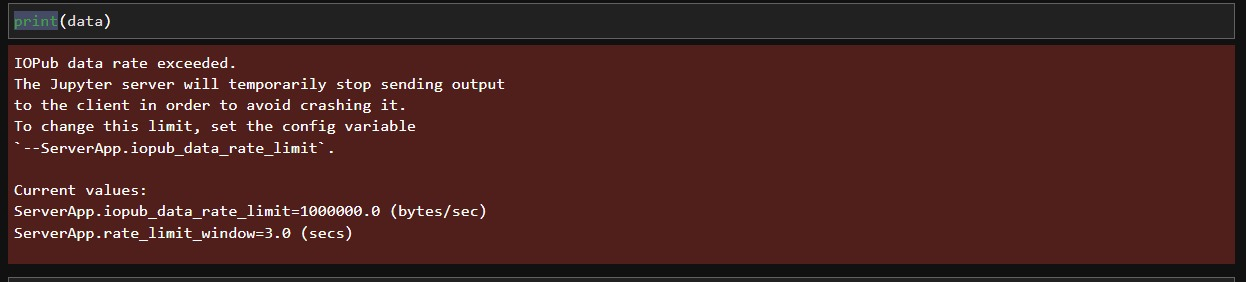 (This was from running 5 chains for 1000 seconds, I could definitely get more data in less time)

In [12]:
# this function takes as input a number of chain, the number of steps the chains should make and a list of dimensions (num_procs,3)
# with a set of starting parameters for each function
def sim_MCMC(num_procs,N_steps,t_list):
  # creates a list for the processes
  procs=[]
  # creates a process with a markov chain and appends it to the list
  for i in range(num_procs):
    proc = multiprocessing.Process(target=MCMC_opt,args=(t_list[i][0],t_list[i][1],t_list[i][2],N_steps,i))
    proc.start()
    procs.append(proc)
  # this step takes the data out of the queue in the order it was put it (not necessarily the order the processes were started in)
  raw_list=[]
  for i in range(num_procs):
    raw_list.append(MCMC_Q.get())
  # this step checks the label of all the data that came out of the queue and sorts it into the correct order
  # this allows for the function to be run several times in a row with each chain remaining independent
  sort_list= []
  for j in range(len(raw_list)):
    for i in range(len(raw_list)):
      if raw_list[i][0]==j:
        sort_list.append(raw_list[i][1:])
  # the function returns a list with the same length as the number of chains
  # where each point in the list is a list with all the datapoints from a specific chain
  return sort_list

Now we have the ability to create multiple chains at the same time we can compare them with the Gelman-Rubin metric. (http://www.stat.columbia.edu/~gelman/research/published/itsim.pdf here is the original paper but I'll go over the important bits)


The metric itself is just this:

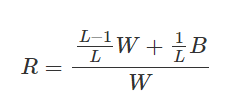

Where L is just the length of your chains, the other two variables require a little more effort to code. One important thing to note is that I calculated the metric for each individual parameter and required them all to match a certain accuracy.

Both variable B and W require the calculation of the the average value of the parameter for one chain (the chain mean) and average of the averages for all the chains (the grand mean).

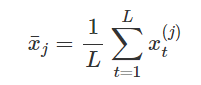   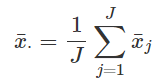

Where J is the number of chains.

Using these definitions B is the variance between the chains:

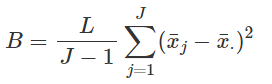

Implemented into code like this:

In [57]:
def B_var(means,grand_mean,chain_len):
    var=0
    for i in range(len(means)):
      var+=(means[i]-grand_mean)**2
    return chain_len/(len(means)-1)*var

And W is the average of the variance within the chains:

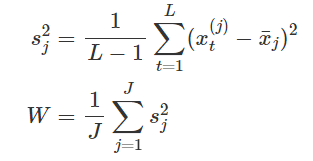

Implemented into code like this:

In [56]:
def W_var(data,mean,num_procs):
  var=0
  for i in range(len(data)):
    var+=(data[i]-mean)**2
  # print(var)
  return var/(len(data)-1)

These functions allowed me to implement the Gelman-Rubin metric, but the data that comes out of the simultaneous MCMC is in a list of lists of tuples. Since I want to analyse each parameter separately the first step is converting the data into a list of lists containing only the values of one parameter for each list.

In [55]:
# this function takes the data that comes out of the sim_MCMC function as input and a value (0,1 or 2) which says which parameter is being analysed
def gelman_rubin(data_in,para):
    # reshapes the data for analysis
    data= []
    for i in range(len(data_in)):
        par_list=[]
        for j in range(len(data_in[i])):
          par_list += [data_in[i][j][para]]
        data.append(par_list)
    # finds the chain length (each chain should be equal)
    L=len(data[0])
    # finds the chain mean for each chain
    mean_list=[]
    for i in range(len(data_in)):
      mean_list.append(np.mean(data[i]))
    # finds the grand mean
    grand_mean= np.mean(mean_list)
    # calculates the variance between the chains
    B=B_var(mean_list,grand_mean,L)
    # calculates the variance within each chain and takes the average
    W=0
    for i in range(len(data_in)):
      s=W_var(data[i],mean_list[i],len(data_in))
      W+=s
    W=W/len(data_in)
    # returns the G-R metric
    return ((L-1)/L*W+(B/L))/W

With all these ingredients (and significantly less sanity than I started with) I finally implemented my vision. This code runs 5 chains simultaneously for 300 steps, then checks their G-R metric and repeats until it hits a desired convergence metric for all 3 parameters.


In [63]:
# the number of chains to run
num_procs=5
# generates random starting values for each chain
t_start = random.rand(num_procs,3)
# the desired convergence value
conv=1.05
# for the G-R metric to work properly it requires a burn in where you run the chain for a bit and then discard the values
# effectively all this does is provide a better set of starting values
burn_list = sim_MCMC(num_procs,5000,t_start)
# takes the final values of the burn in as the starting values for the chain
start_vals=[]
for i in range(num_procs):
  start_vals.append(burn_list[i][-1])
# creates a list to store the data
data_sim=[]
for i in range(num_procs):
    data_sim.append([])
# arbitrary starting values so that the loop starts
R_list=[10,10,10]
while R_list[0]>conv or R_list[1]>conv or R_list[2]>conv:
    # runs the chains and takes the data
    data_new=sim_MCMC(num_procs,5000,start_vals)
    # sets the starting value for each chain based on the last value of the chain
    start_vals=[]
    for i in range(num_procs):
      start_vals.append(data_new[i][-1])
    # sorts the data into the individual chains, the [:-1] makes sure the starting value isnt rerecorded at the beginning of the next loop
    for i in range(num_procs):
        data_sim[i]+=data_new[i][:-1]
    # runs the G-R test for each parameter
    R_list=[]
    for i in range(3):
      R_list.append(gelman_rubin(data_sim,i))
    print(R_list)
    # sets the starting value for each chain based on the last value of the chain
    start_vals=[]
    for i in range(num_procs):
      start_vals.append(data_sim[i][-1])



[1.021371232246358, 1.0223951501121917, 1.0060862070090784]


This particular set converged surprisingly quickly. I dont have time to run a really good one but I do have some data from a wonderfully long run from a different version of this document. I will show it below.

## <font color='deepskyblue'>Plotting: GetDist</font>

We will do the plots with [`GetDist`](https://getdist.readthedocs.io/en/latest/plot_gallery.html).

The plot gallery contains a lot of useful examples, you should be able to read them fairly easily and see which applies to your situation. Look for both (triangle) plots and for parameter estimation.

Note that many `GetDist` functions require arguments of type `MCSamples`; make sure you convert your lists accordingly.

<font color='deepskyblue'>
Look at your results. Do you obtain $\Omega_\Lambda \neq 0$? To a high degree of significance?

If yes, then my dear friend, you have **DISCOVERED THE ACCELERATED EXPANSION OF THE UNIVERSE AND WON THE NOBEL PRIZE IN PHYSICS 2011!**
</font>

I didn't add anything new here, I was too busy trying to make the other functions work. This is just Lorenzos code stuck in a function and made to accept my data.

In [17]:
def data_plot(data):
  h=[]
  OmegaM=[]
  OmegaL=[]
  Omegak=[]
# for i in range(len(data)):
  h+= [t[2] for t in data]
  OmegaM +=[t[1] for t in data]
  OmegaL+=[t[0] for t in data]
  Omegak+=[1-t[0]-t[1] for t in data]
# You can easily create new np.arrays that are functions of other np.arrays

# Let's define variable names and labels
  my_labels = [r'h', r'\Omega_m', r'\Omega_\Lambda', r'\Omega_k']
  my_names = ['h', 'OmegaM', 'OmegaL', 'Omegak']
  my_dim = len(my_names) # The number of variables we're plotting

# This creates a higher-dimensional array with all our data, shaped in the appropriate way...
  my_samples = np.transpose(np.reshape([h, OmegaM, OmegaL, Omegak], (my_dim, len(h))))

# ... to create an "MCSamples" data type, which GetDist can use
  my_samples = MCSamples(samples = my_samples, labels = my_labels, names = my_names)

# The usual 1-sigma confidence level. You can change to 2- or 3-sigma if you want
  conf_level = 0.6827

# This prints a table with the 1D posteriors (confidence levels)
  for nam in my_names:
    print(round(my_samples.confidence(nam,(1.-conf_level)/2.,upper=False),2), \
           " < ", nam , " < ", round(my_samples.confidence(nam,(1.-conf_level)/2.,upper=True),2),\
            " at " , int(100*conf_level),"\b% CL")
  print("\n")

#Triangle corner plot
  j = plots.getSubplotPlotter(subplot_size=3)
  j.settings.axes_labelsize = 22
  j.settings.axes_fontsize = 16
  j.triangle_plot(my_samples, filled = True, title_limit=1)


Here is a demonstration of the basic MCMC function:

In [ ]:
MCMC_opt(0.5,0.5,0.5,20000,1)
# retrieves the data from the queue and removes the label
data1=MCMC_Q.get()[1:]

Removed no burn in
0.7  <  h  <  0.7  at  68% CL
0.2  <  OmegaM  <  0.32  at  68% CL
0.59  <  OmegaL  <  0.79  at  68% CL
-0.1  <  Omegak  <  0.19  at  68% CL




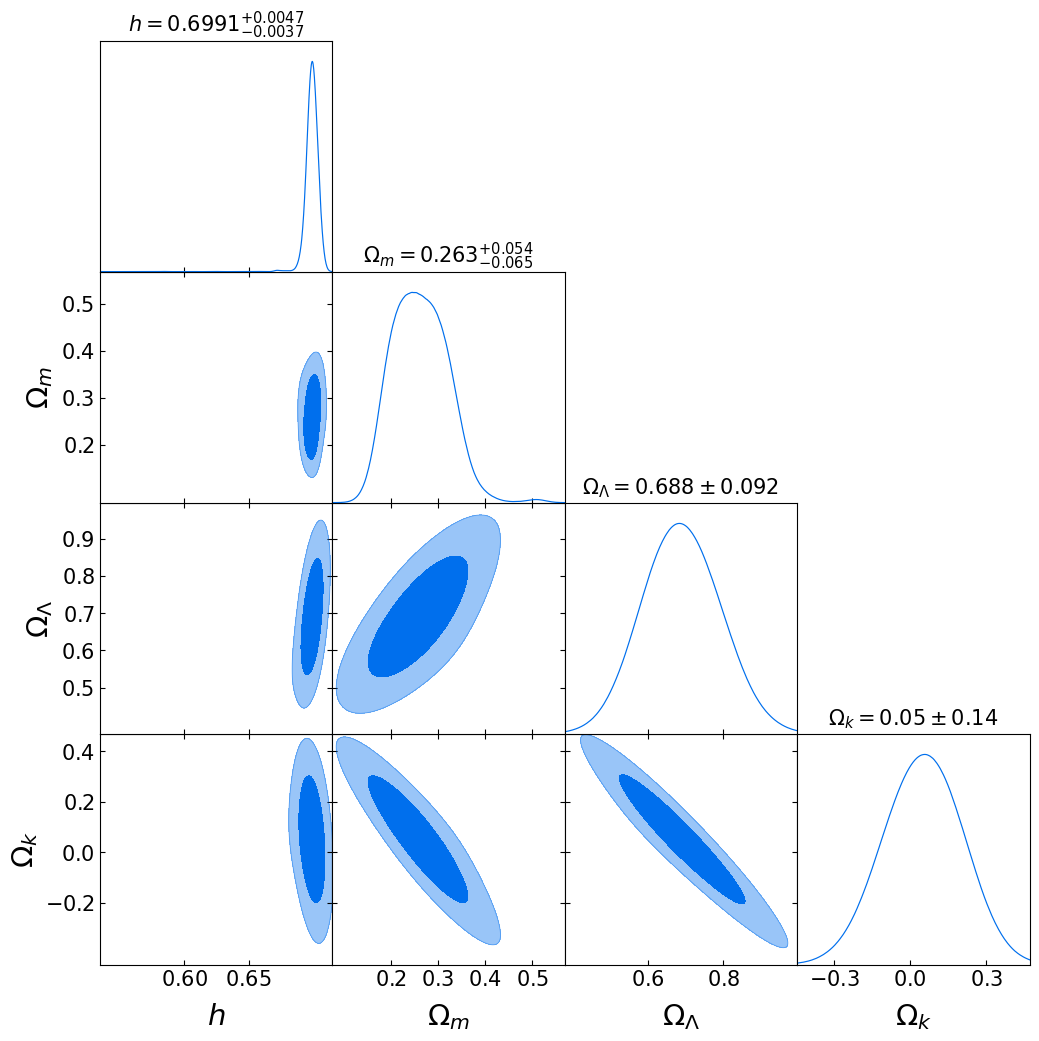

In [28]:
data_plot(data1)

As you can see this converges to the correct values quite effectively, but isn't all that interesting as a function. Lets try the fun ones :)

In [49]:
chain_num=5
start=[]

for i in range(chain_num):
    start.append((0+0.1*i,0.5,1-0.1*i))
data6=sim_MCMC(chain_num,20000,start)

Removed no burn in
0.69  <  h  <  0.7  at  68% CL
0.15  <  OmegaM  <  0.35  at  68% CL
0.53  <  OmegaL  <  0.82  at  68% CL
-0.16  <  Omegak  <  0.33  at  68% CL


Removed no burn in
0.69  <  h  <  0.7  at  68% CL
0.2  <  OmegaM  <  0.33  at  68% CL
0.57  <  OmegaL  <  0.79  at  68% CL
-0.11  <  Omegak  <  0.22  at  68% CL


Removed no burn in
0.7  <  h  <  0.7  at  68% CL
0.21  <  OmegaM  <  0.34  at  68% CL
0.62  <  OmegaL  <  0.82  at  68% CL
-0.15  <  Omegak  <  0.17  at  68% CL


Removed no burn in
0.69  <  h  <  0.7  at  68% CL
0.17  <  OmegaM  <  0.33  at  68% CL
0.54  <  OmegaL  <  0.79  at  68% CL
-0.12  <  Omegak  <  0.27  at  68% CL


Removed no burn in
0.7  <  h  <  0.7  at  68% CL
0.19  <  OmegaM  <  0.32  at  68% CL
0.58  <  OmegaL  <  0.77  at  68% CL
-0.09  <  Omegak  <  0.22  at  68% CL




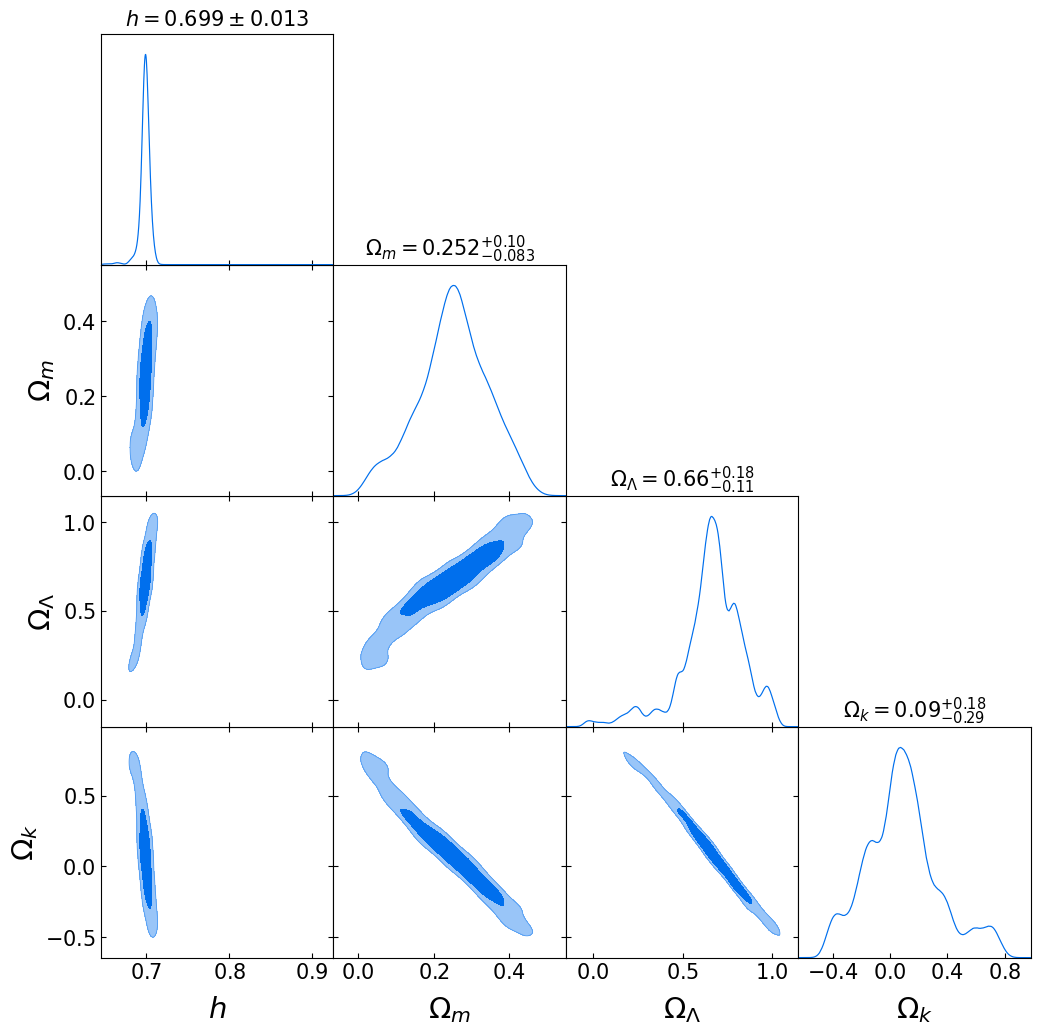

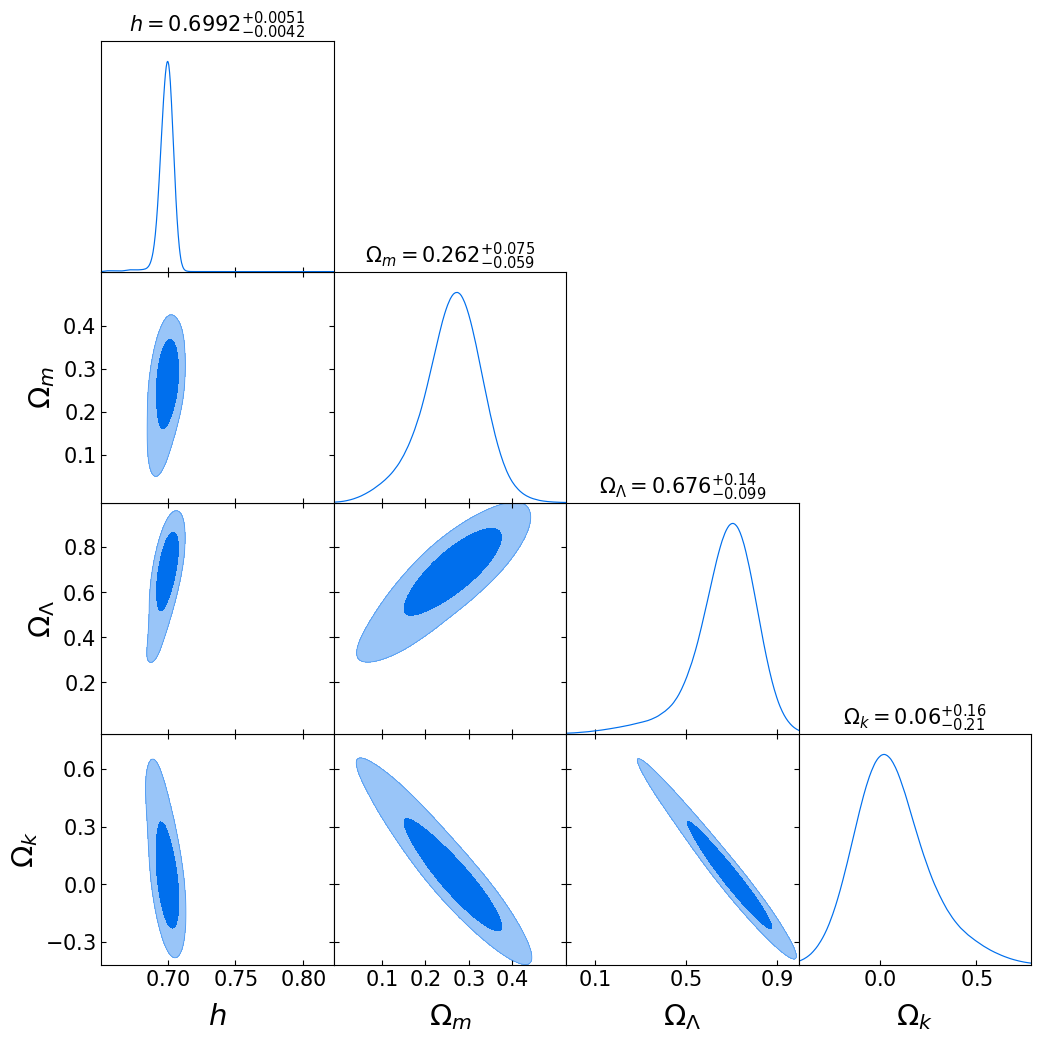

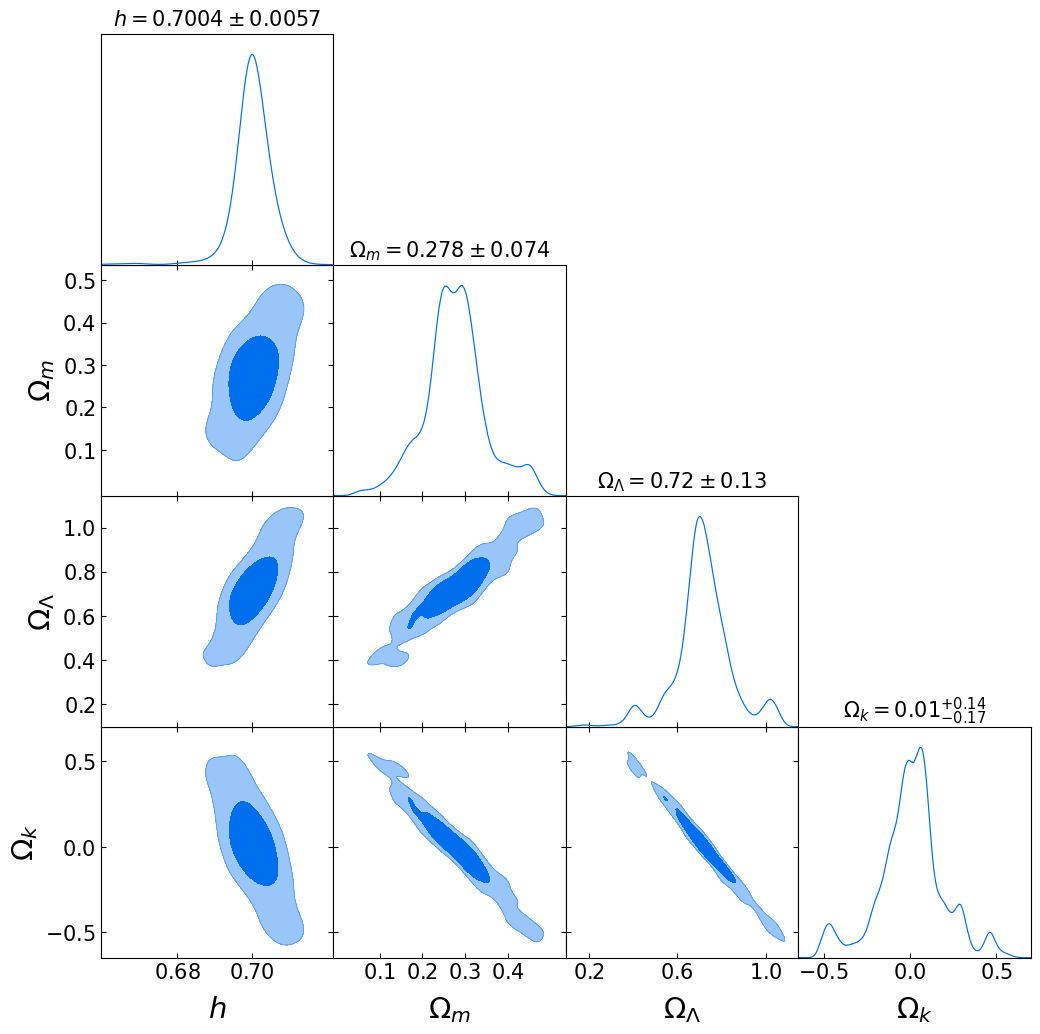

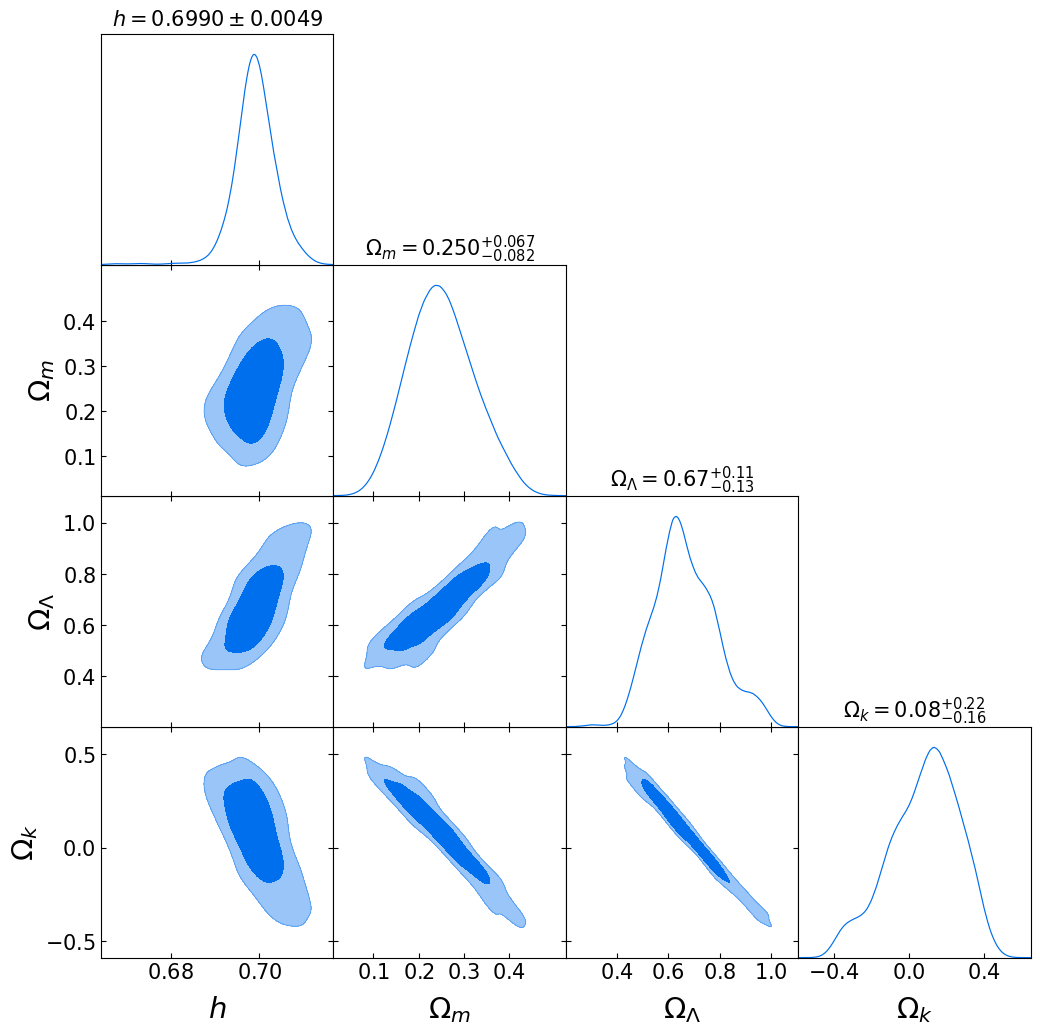

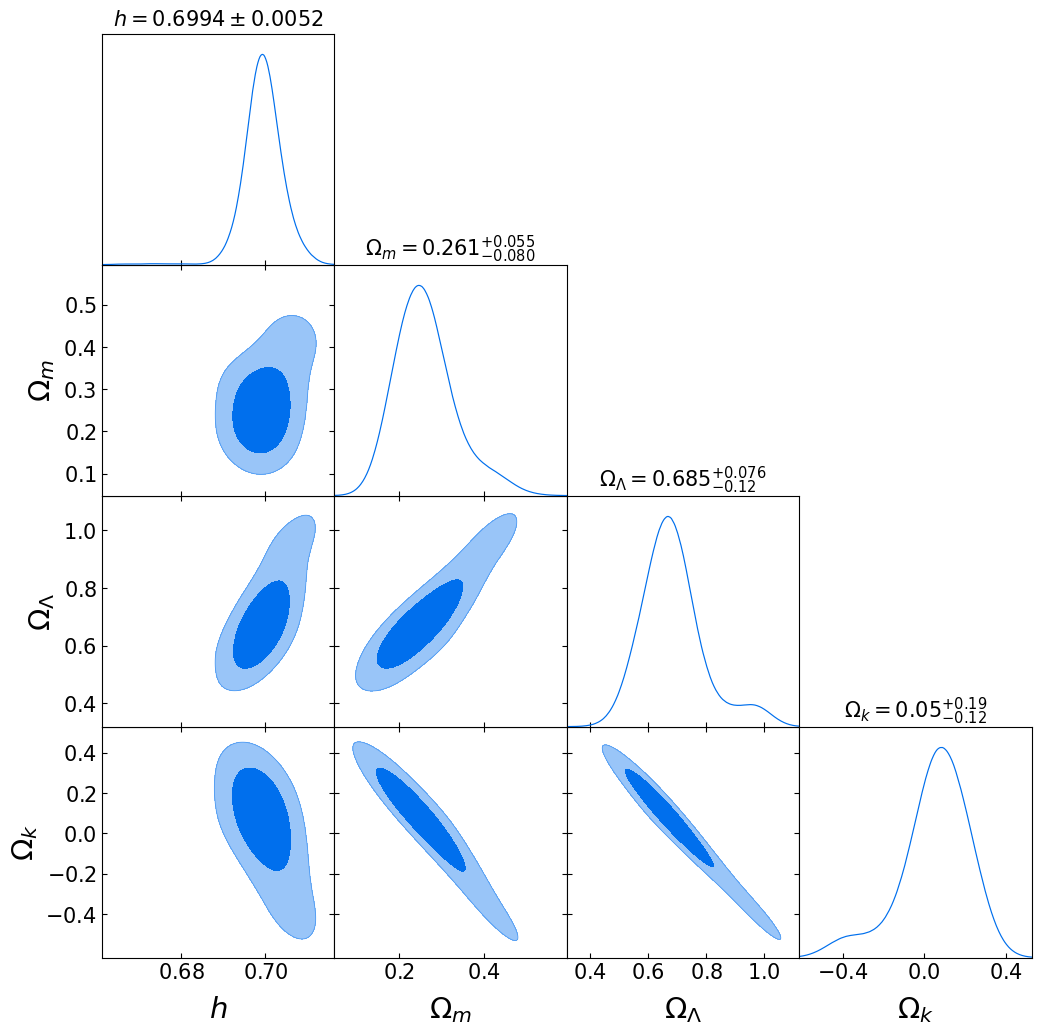

In [50]:
for i in data6:
    data_plot(i)

The simultaneous MCMC function also returns great results and in amazingly quick time.
Lets combine all of the above chains into one dataset:

In [51]:
data7=[]
for i in data6:
    data7+=i

Removed no burn in
0.7  <  h  <  0.7  at  68% CL
0.19  <  OmegaM  <  0.33  at  68% CL
0.57  <  OmegaL  <  0.8  at  68% CL
-0.13  <  Omegak  <  0.24  at  68% CL




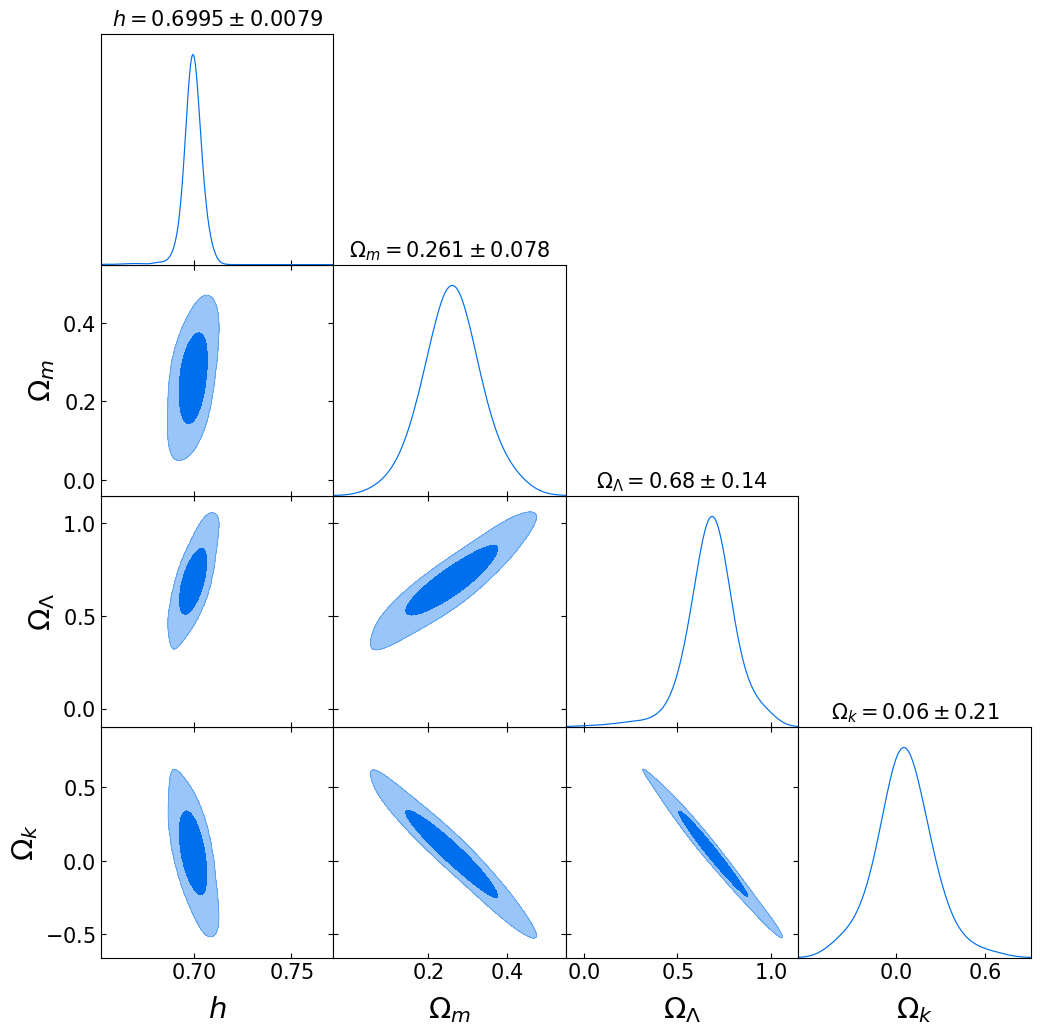

In [52]:
data_plot(data7)

These results are remarkably accurate.
Now lets check the data from the G-R test code:

Removed no burn in
0.7  <  h  <  0.7  at  68% CL
0.21  <  OmegaM  <  0.32  at  68% CL
0.63  <  OmegaL  <  0.78  at  68% CL
-0.08  <  Omegak  <  0.14  at  68% CL




Removed no burn in
0.7  <  h  <  0.7  at  68% CL
0.21  <  OmegaM  <  0.32  at  68% CL
0.61  <  OmegaL  <  0.78  at  68% CL
-0.1  <  Omegak  <  0.16  at  68% CL




Removed no burn in
0.7  <  h  <  0.7  at  68% CL
0.22  <  OmegaM  <  0.31  at  68% CL
0.62  <  OmegaL  <  0.77  at  68% CL
-0.06  <  Omegak  <  0.15  at  68% CL


Removed no burn in
0.7  <  h  <  0.7  at  68% CL
0.22  <  OmegaM  <  0.33  at  68% CL
0.63  <  OmegaL  <  0.79  at  68% CL
-0.11  <  Omegak  <  0.15  at  68% CL


Removed no burn in
0.7  <  h  <  0.7  at  68% CL
0.21  <  OmegaM  <  0.35  at  68% CL
0.59  <  OmegaL  <  0.81  at  68% CL
-0.14  <  Omegak  <  0.19  at  68% CL




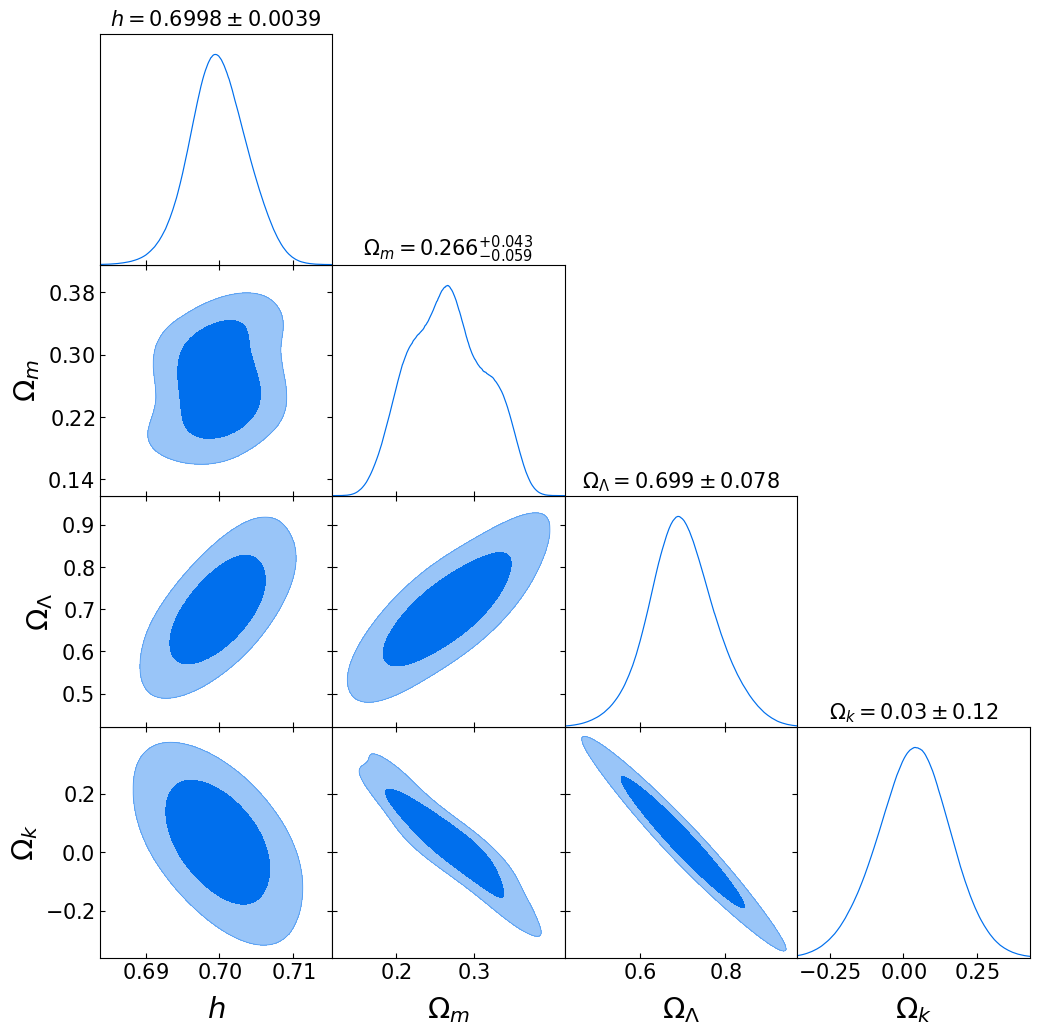

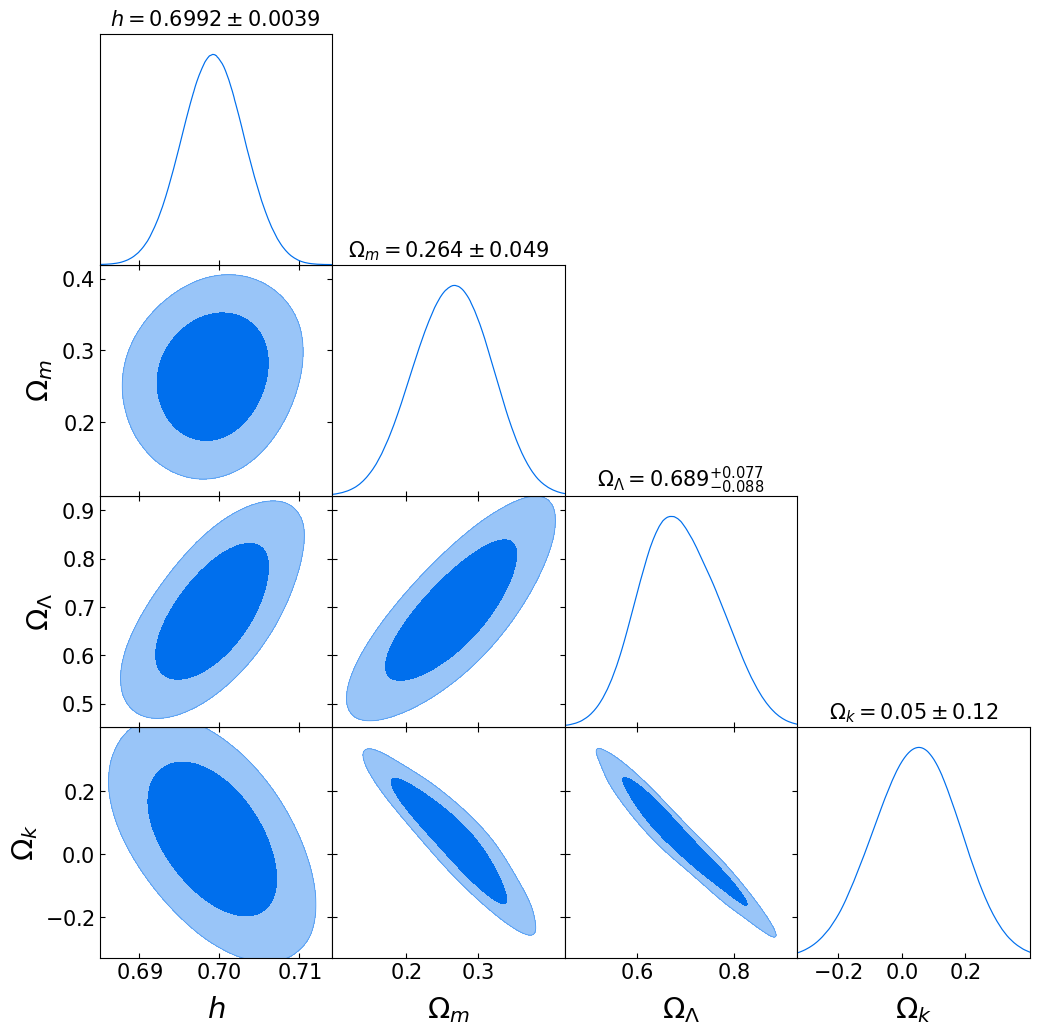

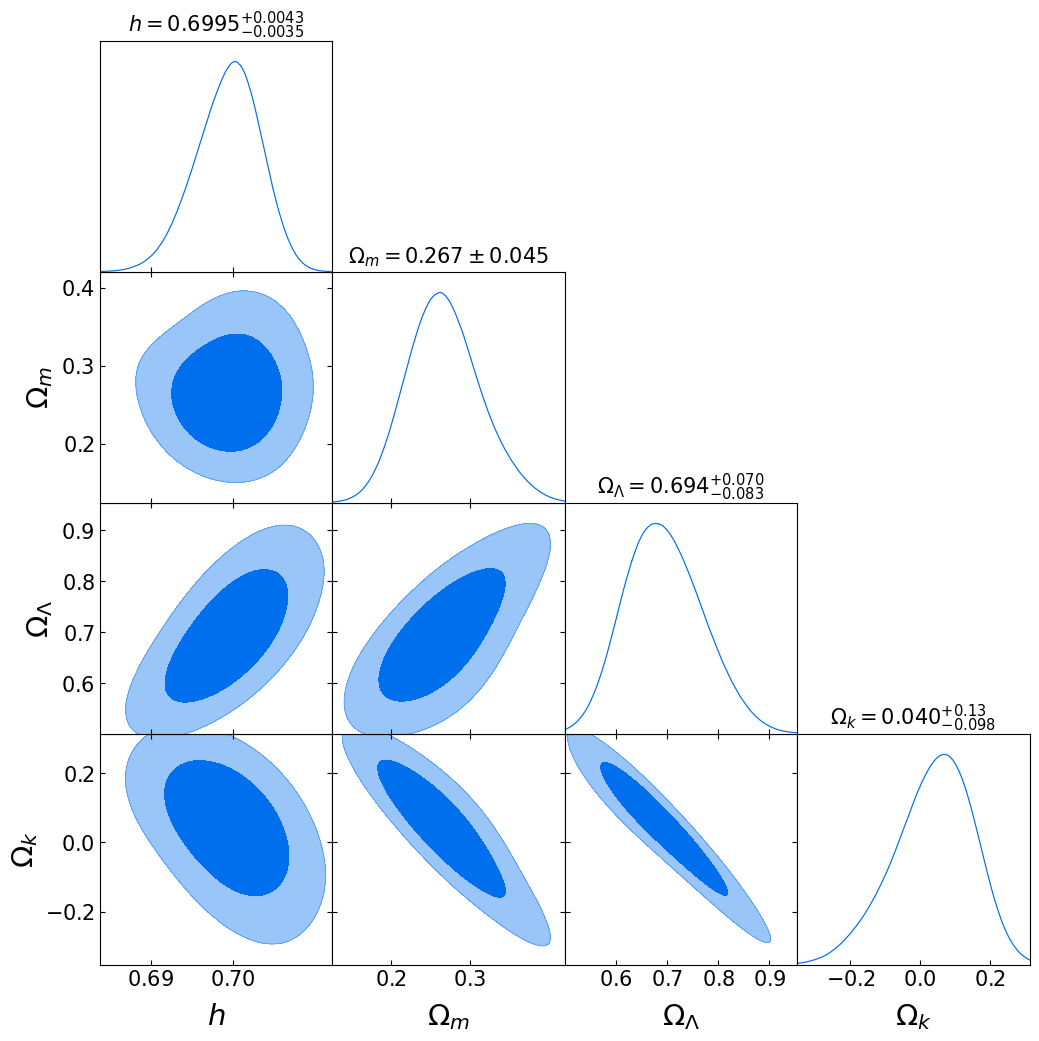

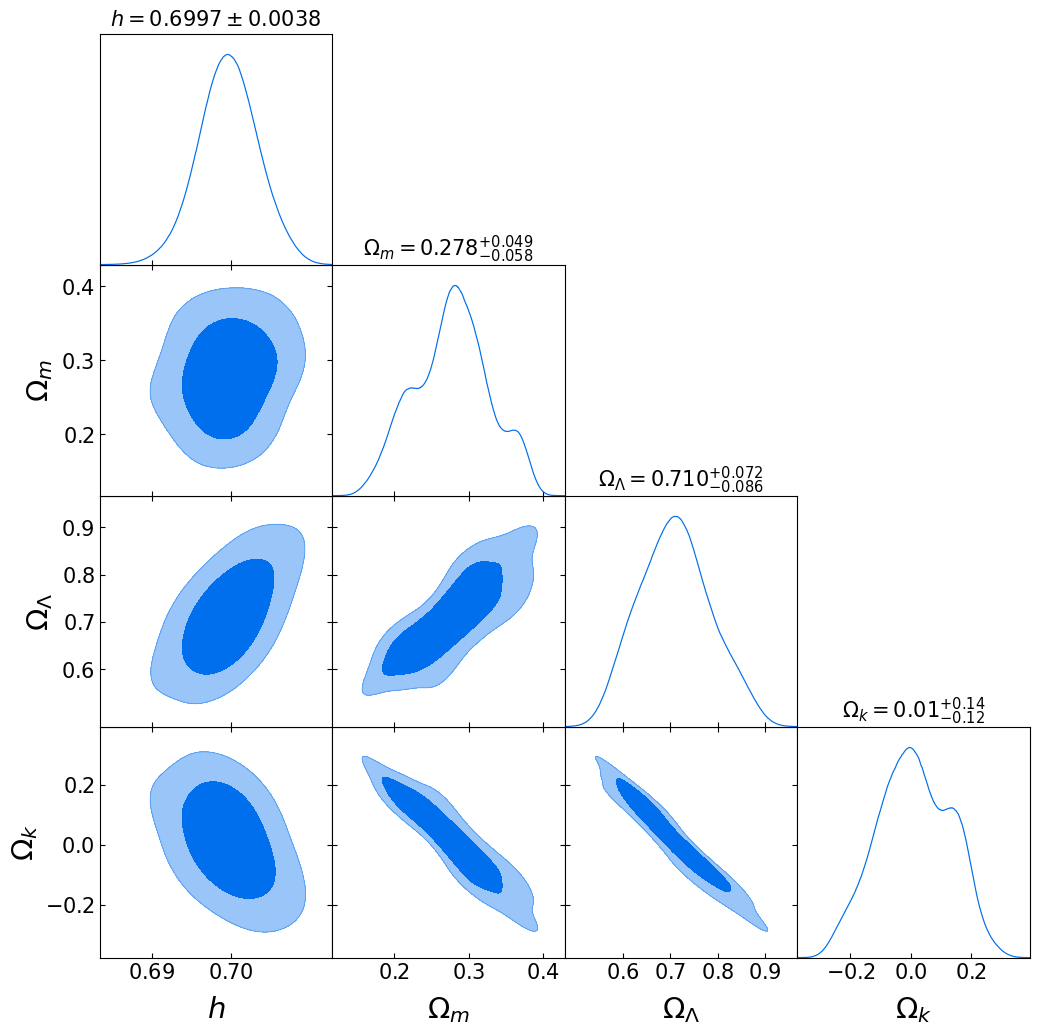

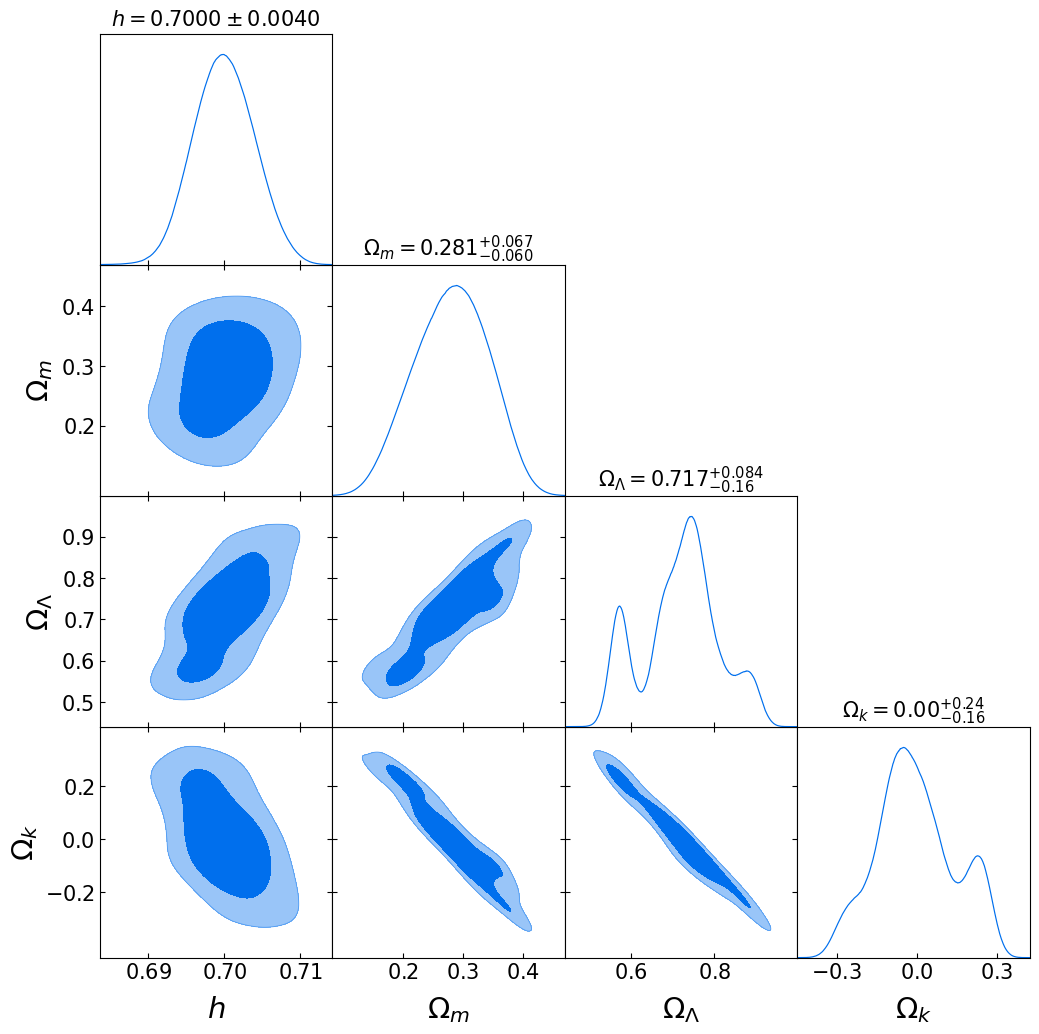

In [64]:
for i in data_sim:
    data_plot(i)

As I mentioned earlier this set converged wierdly fast, I may have done a too long burn in (overcooked the data)
or the starting values happened to be advantageous. Lets still check the combined set:

Removed no burn in
0.7  <  h  <  0.7  at  68% CL
0.22  <  OmegaM  <  0.33  at  68% CL
0.62  <  OmegaL  <  0.78  at  68% CL
-0.1  <  Omegak  <  0.15  at  68% CL




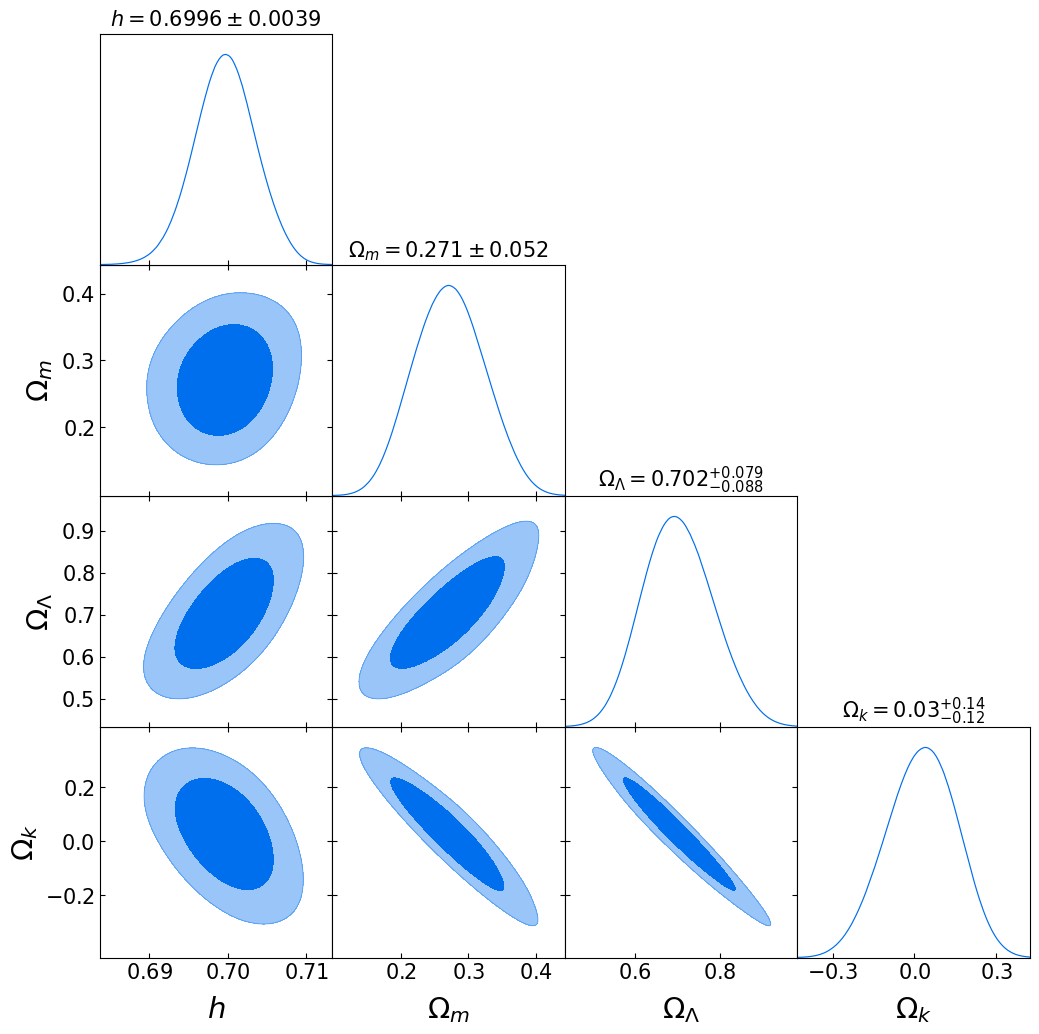

In [66]:
data8=[]
for i in data_sim:
    data8+=i
data_plot(data8)

Now for my pièce de résistance; in a previous version of this document I ran the Gelman-Rubin convergence code for a dataset that did not particularly want to converge. This left me with 125k data points and a very satisfying graph:

In [82]:
import ast
with open('prettier_data.txt', 'r') as file:
    content = file.read()
data_pretty = ast.literal_eval(content)

No. of data points: 124983
Removed no burn in
0.7  <  h  <  0.7  at  68% CL
0.22  <  OmegaM  <  0.32  at  68% CL
0.62  <  OmegaL  <  0.79  at  68% CL
-0.11  <  Omegak  <  0.15  at  68% CL




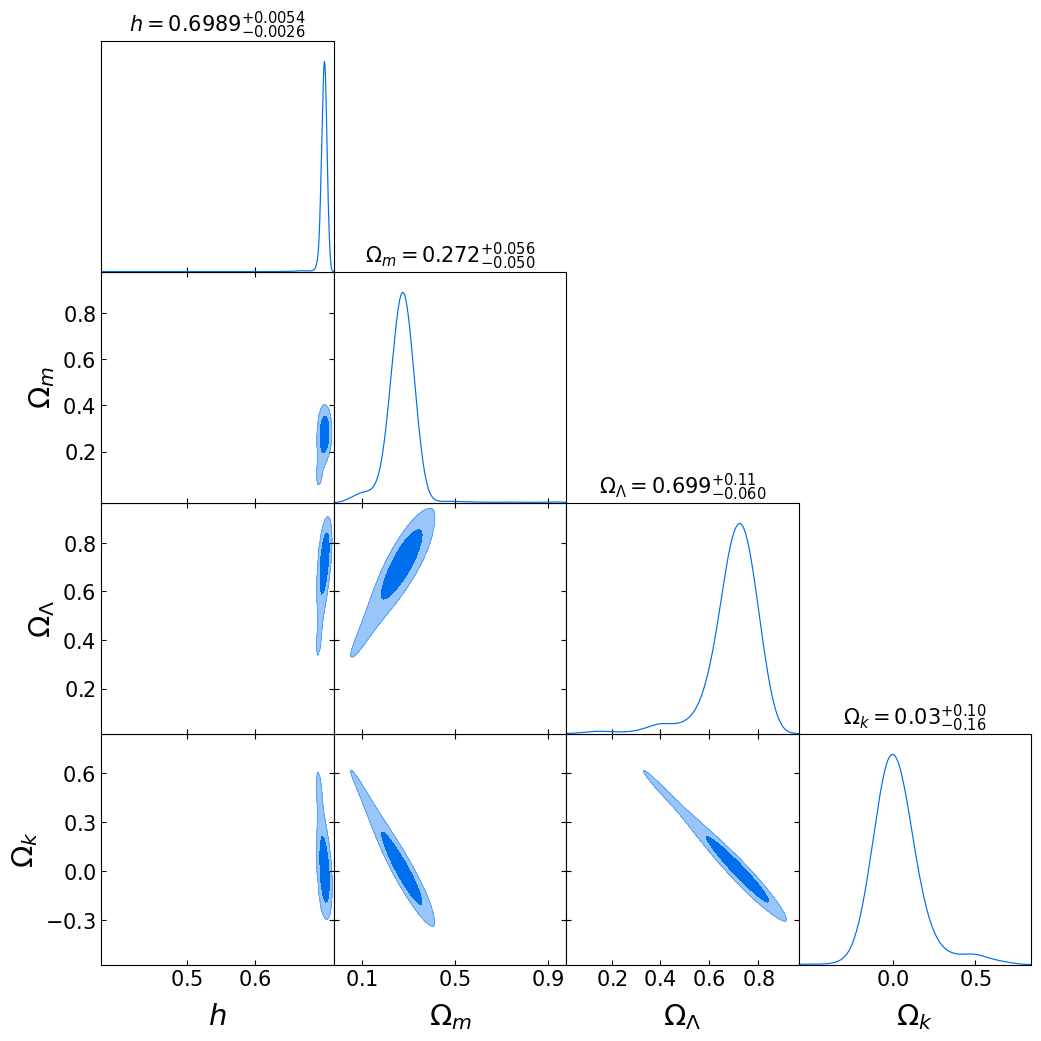

In [87]:
data10=[]
for i in data_pretty:
    data10+=i
print('No. of data points:',len(data10))
data_plot(data10)

This is probably the most accurate data you will see all day. I was planning to try some of the other improvements but I spent all of my time on this, but even without any extra improvements I think we can quite definitively say the universe is expanding and it is accelerating.

## <font color='deepskyblue'>Further Improvements</font>

There are many ways in which you can improve your code and/or your data visualisation. Some ideas, in random order:

* Modify your priors and compare your results. For instance:
  * Change to log-flat priors for $h$ and/or $\Omega_m$, namely displace them in log-space instead of linear space:
  $$
  \log(h_{\rm new}) = \log(h_{\rm old}) + \delta
  $$
  where $\delta$ a random variable of mean 0
  * Use priors from other cosmological probes, for example the [Planck 2018 results](https://arxiv.org/abs/1807.06209):
  $$
  \Omega_m = 0.315 \pm 0.007\,,~\dots
  $$
* Monitor acceptance ratio and $\chi^2$ as a function of step count
* Implement a Gelman-Rubin (or alternative) convergence test
* Change colours and other properties of your triangle plot
* Re-plot the data with your theoretical fits: you can try both your best fit, and some $1\sigma$ "error bars"
* Split your data in redshift bins and repeat the analysis for each bin individually.
<br> _(What do you notice? Which redshift bins give us the most accurate detection of the cosmological parameters?)_